In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xml.etree.ElementTree as Xet
import matplotlib
from matplotlib import pylab as py
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
#read in data 
data = pd.read_csv('test.dat',sep=' ',names=['date','lat','lon','depth','magnitude'])
iris = pd.read_csv('iris_SKorea.dat',sep='|', names=['EventID','Time','Latitude','Longitude','Depth','Author','Catalog','Contributor','ContributorID','MagType','Magnitude','MagAuthor','EventLocationName'])
isc = pd.read_csv('events.dat', sep='\t', names=['Lon','Lat','DecimalYear','Month','Day','Magnitude','Depth[km]','Hr','Min','Sec'],engine='python')

In [3]:
isc.drop([483,485,486,487,488,489,490,491,491,493,494,535,536,537,538,539,540,541,542,543,544], axis=0)
test2=np.where(isc['Magnitude']>5)

In [4]:
#sorting Iris data by magnitude type
a=np.where(iris['MagType'] == 'NIL')
b=np.where(iris['MagType'] == 'ML')
c=np.where(iris['MagType'] == 'mb')
d=np.where(iris['MagType'] == 'Mww')
e=np.where(iris['MagType'] == 'Mwr')
f=np.where(iris['MagType'] == 'Mw')
g=np.where(iris['MagType'] == 'MW')
h=np.concatenate((d,e,f,g), axis=None)
magtypes=np.unique(iris['MagType'])

In [5]:
#homogenization of magnitude
muNil = iris.loc[a]['Magnitude'].mean()
sdNil = iris.loc[a]['Magnitude'].std()
Mnil = iris.loc[a]['Magnitude']

muML = iris.loc[b]['Magnitude'].mean()
sdML = iris.loc[b]['Magnitude'].std()
MML = iris.loc[b]['Magnitude']

mumb = iris.loc[c]['Magnitude'].mean()
sdmb = iris.loc[c]['Magnitude'].std()
Mmb = iris.loc[c]['Magnitude']

muMww = iris.loc[d]['Magnitude'].mean()
sdMww = iris.loc[d]['Magnitude'].std()
MMww = iris.loc[d]['Magnitude']

muMwr = iris.loc[e]['Magnitude'].mean()
sdMwr = iris.loc[e]['Magnitude'].std()
MMwr = iris.loc[e]['Magnitude']

muMw = iris.loc[f]['Magnitude'].mean()
sdMw = iris.loc[f]['Magnitude'].std()
MMw = iris.loc[f]['Magnitude']

muMW = iris.loc[g]['Magnitude'].mean()
sdMW = iris.loc[g]['Magnitude'].std()
MMW = iris.loc[g]['Magnitude']

muM = iris.loc[h]['Magnitude'].mean()
sdM = iris.loc[h]['Magnitude'].std()
MM = iris.loc[h]['Magnitude']

Mall = iris['Magnitude']
muall = iris['Magnitude'].mean()
sdall = iris['Magnitude'].std()

binsT=np.linspace(0.5, 7.9, num=64)
Misc = isc['Magnitude']
muisc = isc['Magnitude'].mean()
sdisc = isc['Magnitude'].std()

In [6]:
m = Misc
mu = muisc
sd = sdisc

binsT=np.linspace(0.5, 7.9, num=64)

num_eq = len(m)
min_mag=min(m)
max_mag=max(m)
interval = 0.05
print ('Minimum magnitude:', min_mag)
print ('Total number of earthquakes:', num_eq)
print ('Maximum catalog magnitude:', max(m))
print ('Mmax = ', max_mag)
max_mag_bin = max(m) + 0.15

# Magnitude bins
bins = np.arange(min_mag, max_mag_bin, interval)
years = divmod(isc['DecimalYear'],1)
num_years = max(years[0])-min(years[0])
plot_bins = np.arange(min_mag, max_mag, interval)
annual_num_eq = num_eq/num_years

Minimum magnitude: 1.0
Total number of earthquakes: 642
Maximum catalog magnitude: 5.39
Mmax =  5.39


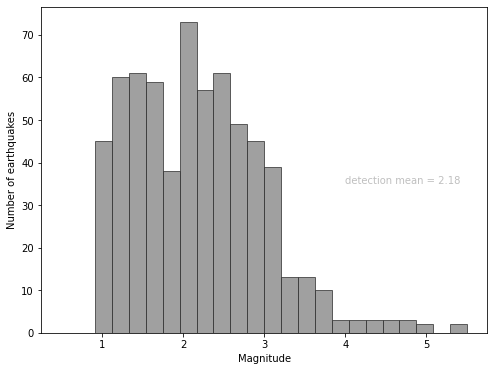

In [7]:
#Plotting Histogram of all the events 

fig, ax = plt.subplots(figsize=(8,6))
hist, bins, _ = ax.hist(m, bins=np.linspace(0.5, 5.5, num=25), color='grey', alpha=0.75, edgecolor='0.2')
ax.set(xlabel='Magnitude', ylabel='Number of earthquakes');
ax.text(4,35, r'detection mean = {:2.2f}'.format(mu),color='grey',alpha=0.5)
hist = hist[::-1]
bins = bins[::-1]
cum_hist = hist.cumsum()
bins = bins[1:]
fig.savefig('histogram.jpg', format='jpg', dpi=300, bbox_inches='tight', pad_inches=0.05)

In [8]:
## Get annual rate
cum_annual_rate = cum_hist/num_years
new_cum_annual_rate = []
for i in cum_annual_rate:
    new_cum_annual_rate.append(i+1e-20)

#Take logarithm
log_cum_sum = np.log10(new_cum_annual_rate)
    
# Fit a least squares curve
b,a = np.polyfit(bins, log_cum_sum, 1)
print ('Least Squares: b value', -1. * b, 'a value', a)
alpha = np.log(10) * a
beta = -1.0 * np.log(10) * b

# Maximum Likelihood Estimator fitting
# b value
b_mle = np.log10(np.exp(1)) / (np.mean(m) - min_mag)
beta_mle = np.log(10) * b_mle
print ('Maximum Likelihood: b value', b_mle)


Least Squares: b value 0.566330753008 a value 1.77194035814
Maximum Likelihood: b value 0.369602525792


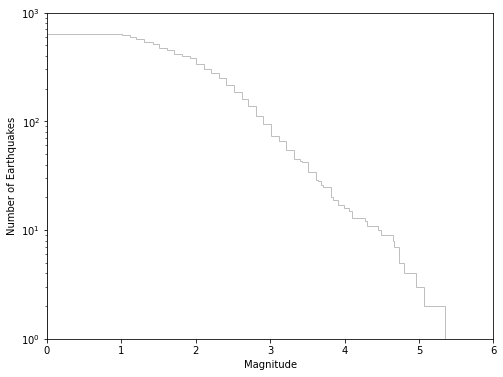

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
n, bint, _ = ax.hist(m, bins=np.linspace(0, 6, num=276), density=False, histtype='step',
                           cumulative=-1, label='Empirical',color='grey', alpha=0.5, edgecolor='grey')
#plt.plot( bins[:-1], np.cumsum(n) )
y = ((1 / (np.sqrt(2 * np.pi) * sd)) *
     np.exp(-0.5 * (1 / sd * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]
ax.set(xlabel='Magnitude', ylabel='Number of Earthquakes');
ax.set_xlim(0, 6)
ax.set_yscale('log')
ax.set_ylim(1, 1000,10)
fig.savefig('cumulative.jpg', format='jpg', dpi=300, bbox_inches='tight', pad_inches=0.05)

In [10]:
###########################################################################
# Generate data to plot results
###########################################################################
# Generate data to plot least squares linear curve
# Calculate y-intercept for least squares solution
#b=1
yintercept = log_cum_sum[-1] - b * min_mag
ls_fit = b * plot_bins + yintercept
log_ls_fit = []
for value in ls_fit:
    log_ls_fit.append(np.power(10,value))
    
# Generate data to plot bounded Gutenberg-Richter for LS solution
numer = np.exp(-1. * beta * (plot_bins - min_mag)) -  np.exp(-1. *beta * (max_mag - min_mag))
denom = 1. - np.exp(-1. * beta * (max_mag - min_mag))
ls_bounded = annual_num_eq * (numer / denom)
        
# Generate data to plot maximum likelihood linear curve
mle_fit = -1.0 * b_mle * plot_bins + 1.0 * b_mle * min_mag + np.log10(annual_num_eq)
log_mle_fit = []
for value in mle_fit:
    log_mle_fit.append(np.power(10,value))
    
# Generate data to plot bounded Gutenberg-Richter for MLE solution
numer = np.exp(-1. * beta_mle * (plot_bins - min_mag)) - np.exp(-1. *beta_mle * (max_mag - min_mag))
denom = 1. - np.exp(-1. * beta_mle * (max_mag - min_mag))
mle_bounded = annual_num_eq * (numer / denom)

# Compare b-value of 1
fit_data = -1.0 * plot_bins + min_mag + np.log10(annual_num_eq)
log_fit_data = []
for value in fit_data:
    log_fit_data.append(np.power(10,value))


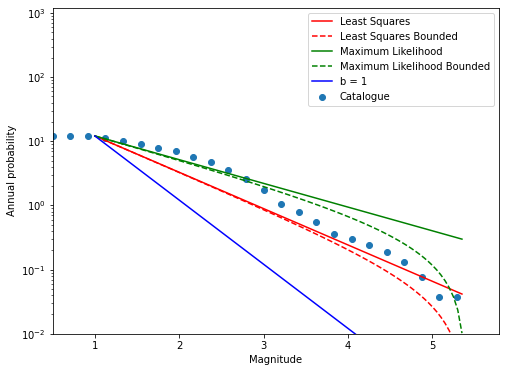

In [11]:
###########################################################################
# Plot the results
###########################################################################
# Plotting
#fig = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(bins, new_cum_annual_rate, label = 'Catalogue')
ax = plt.gca()
ax.plot(plot_bins, log_ls_fit, c = 'r', label = 'Least Squares')
ax.plot(plot_bins, ls_bounded, c = 'r', linestyle ='--', label = 'Least Squares Bounded')
ax.plot(plot_bins, log_mle_fit, c = 'g', label = 'Maximum Likelihood')
ax.plot(plot_bins, mle_bounded, c = 'g', linestyle ='--', label = 'Maximum Likelihood Bounded')
ax.plot(plot_bins, log_fit_data, c = 'b', label = 'b = 1')
    
#ax.plot(bins, ls_fit2, c = 'k')
ax.set_yscale('log')
ax.legend()
ax.set_ylim([ 0.01, max(new_cum_annual_rate) * 100])
ax.set_xlim([min_mag - 0.5, max_mag + 0.4])
ax.set_ylabel('Annual probability')
ax.set_xlabel('Magnitude')
plt.show()
fig.savefig('bvalue-comparision.jpg', format='jpg', dpi=300, bbox_inches='tight', pad_inches=0.05)

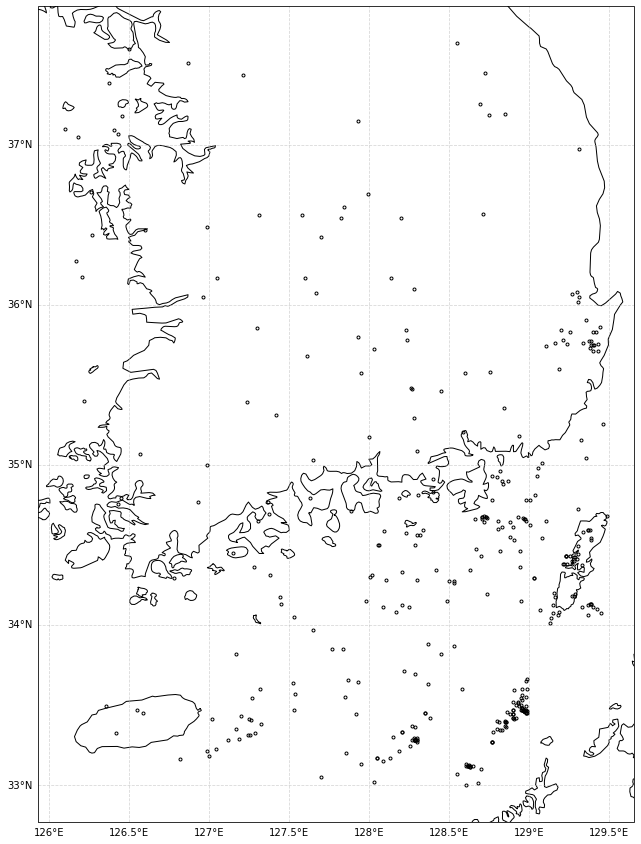

In [12]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.plot(iris['Longitude'], iris['Latitude'], '.',
        mfc='None', mec='black', transform = ccrs.PlateCarree())
ax.coastlines('10m')
gl = ax.gridlines(draw_labels=True, alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.show()